In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

sns.set_style('darkgrid')

In [2]:
train_df = pd.read_csv("train.csv", parse_dates=["date"])
test_df = pd.read_csv("test.csv", parse_dates=["date"])
train_df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [3]:
test_df

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [4]:
train_df['country']

0            Canada
1            Canada
2            Canada
3            Canada
4            Canada
            ...    
230125    Singapore
230126    Singapore
230127    Singapore
230128    Singapore
230129    Singapore
Name: country, Length: 230130, dtype: object

In [5]:
unique_counts_date = train_df['country'].value_counts()
unique_counts_date

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [6]:
unique_counts_date = test_df['country'].value_counts()
unique_counts_date

country
Canada       16425
Finland      16425
Italy        16425
Kenya        16425
Norway       16425
Singapore    16425
Name: count, dtype: int64

C:\Users\gauur\AppData\Local\Temp\ipykernel_18040\106734316.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gauur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gauur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gauur\AppData\Local\Programs\Python\Python311\Li

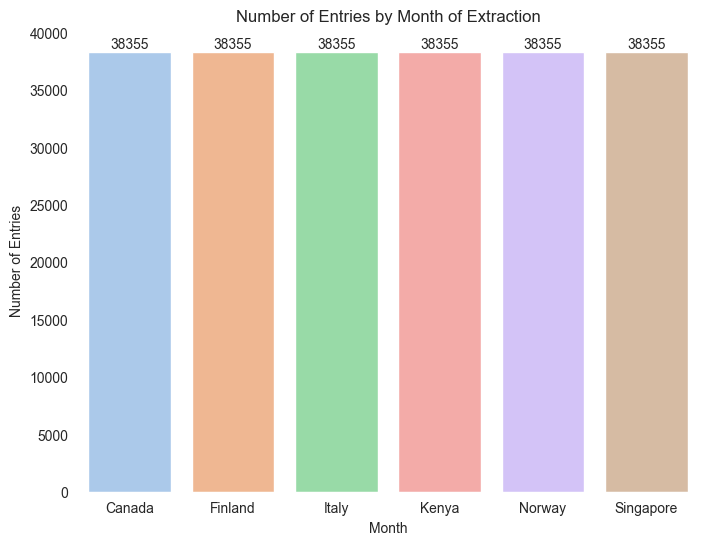

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure train_df['country'] is available and contains valid data
unique_counts_date = train_df['country'].value_counts()  # Example for 'country'

# Convert to a DataFrame for Seaborn
unique_counts_date_df = unique_counts_date.reset_index()
unique_counts_date_df.columns = ['Month', 'Entries']

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Month', y='Entries', data=unique_counts_date_df, palette='pastel'
)
for i, count in enumerate(unique_counts_date):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

# Customizing the chart
plt.title('Number of Entries by Month of Extraction')
plt.xlabel('Month')
plt.ylabel('Number of Entries')

# Optional: Set a transparent background
plt.gca().patch.set_alpha(0.0)
plt.show()

In [8]:
train_df.sample(5).date

763      2010-01-09
218943   2016-08-29
70200    2012-02-20
210426   2016-05-27
141009   2014-04-16
Name: date, dtype: datetime64[ns]

In [9]:
train_df.num_sold.describe()

count    221259.000000
mean        752.527382
std         690.165445
min           5.000000
25%         219.000000
50%         605.000000
75%        1114.000000
max        5939.000000
Name: num_sold, dtype: float64

In [10]:
train_df["num_sold"].isna().sum()

8871

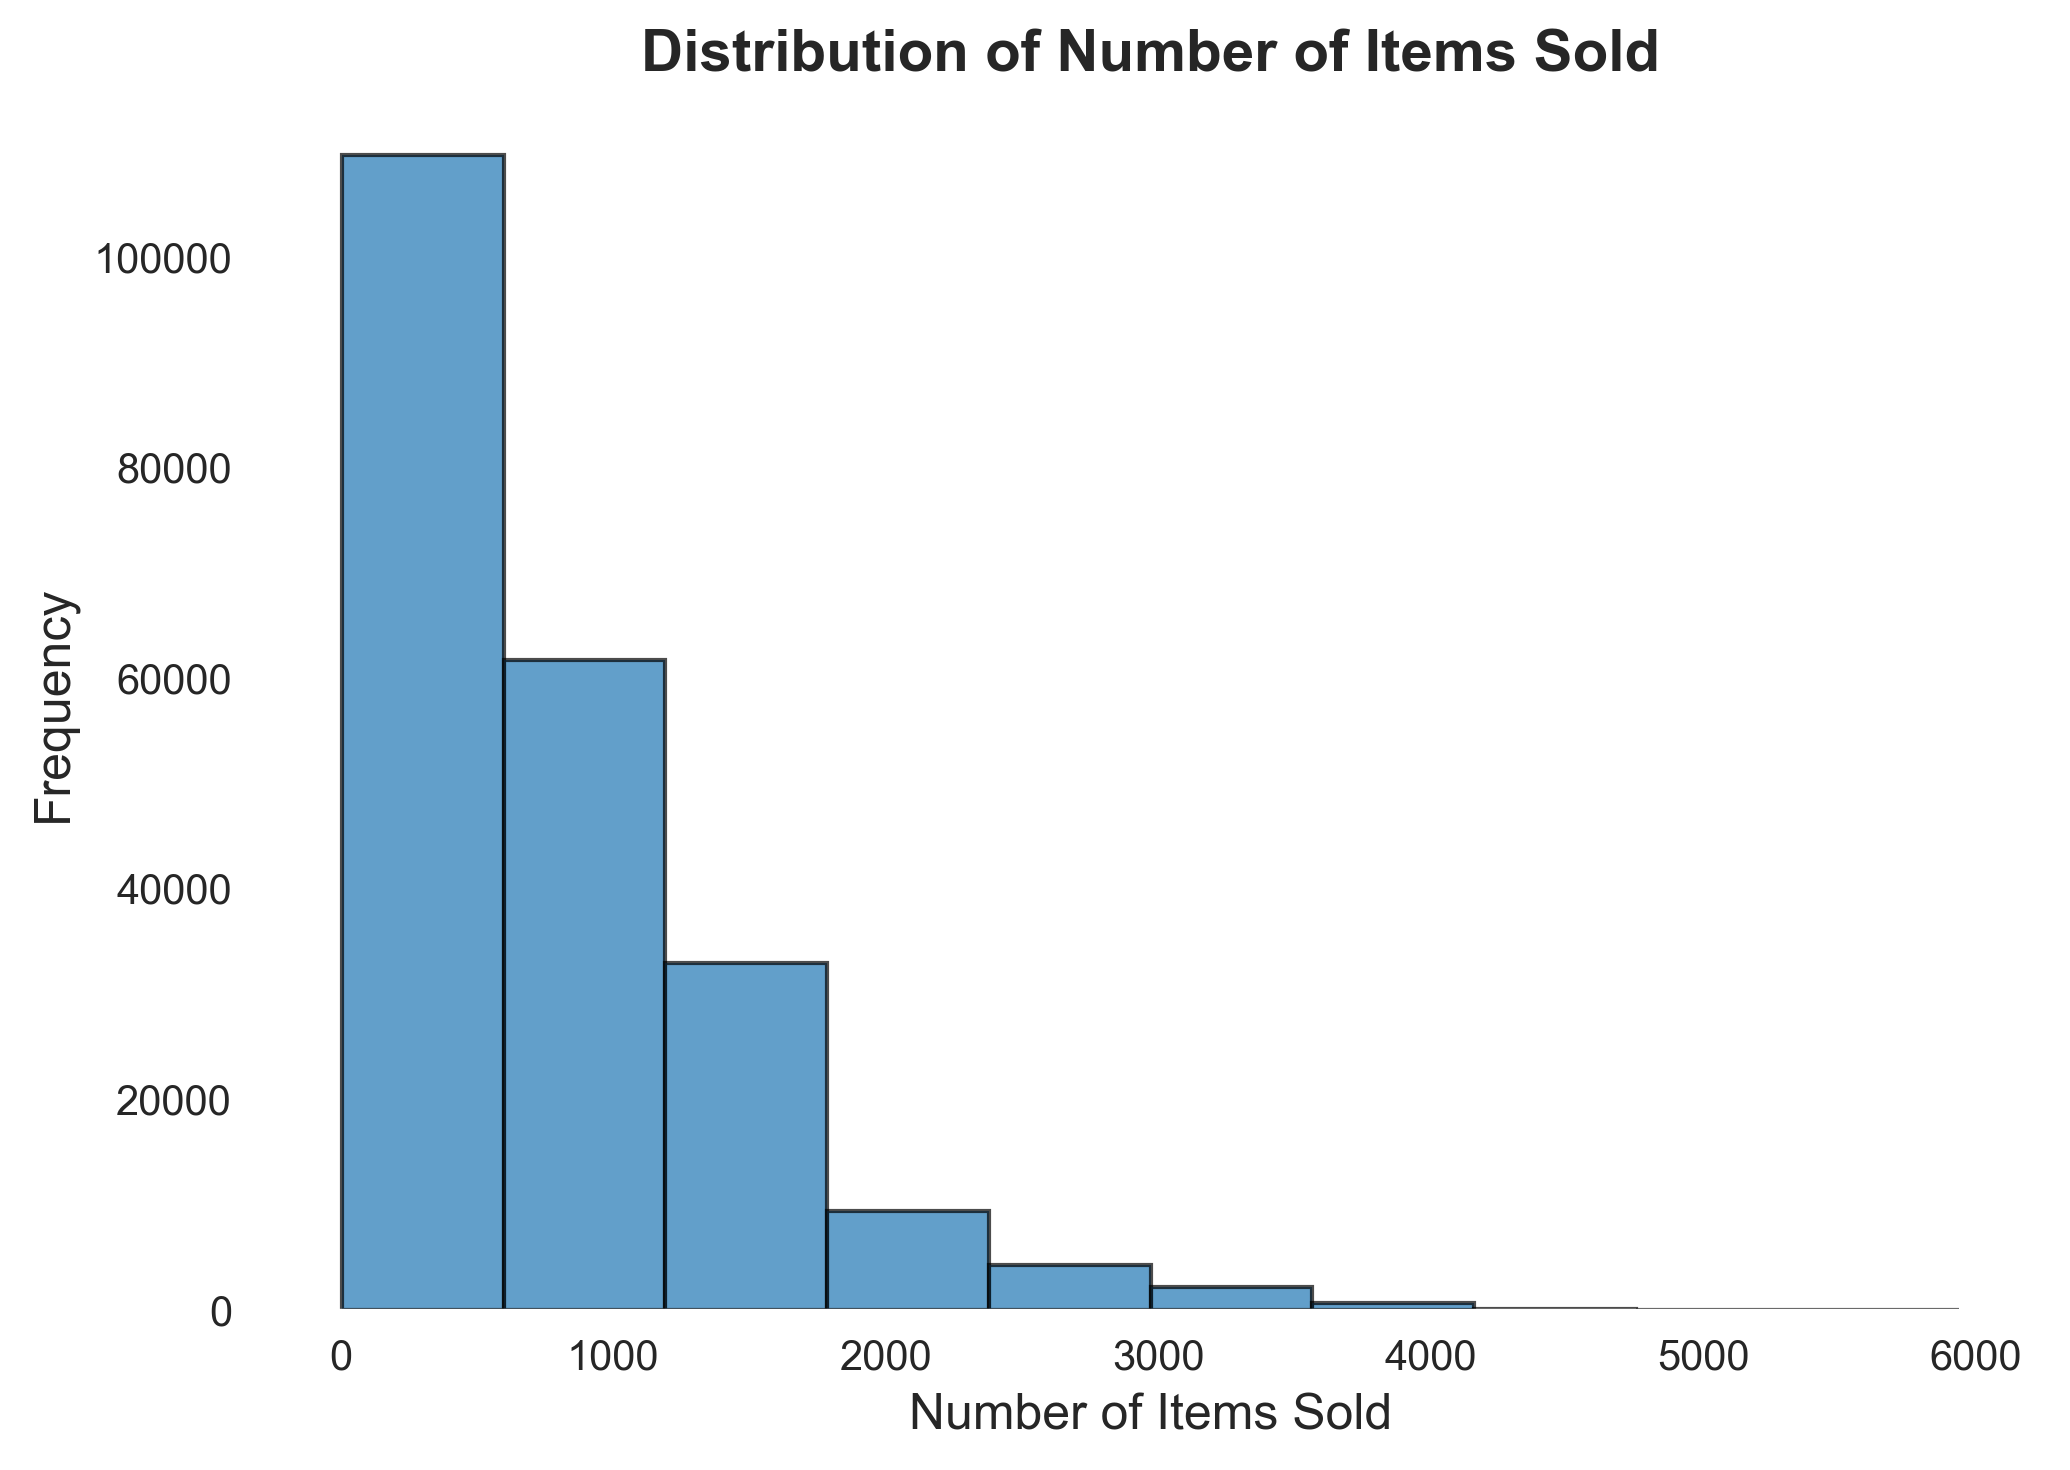

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Drop missing values from 'num_sold' column
train_df_cleaned = train_df['num_sold'].dropna()

# Plot histogram
plt.figure(figsize=(7, 5), dpi=300)  # Higher DPI for better resolution
plt.hist(train_df_cleaned, bins=10, edgecolor='black', alpha=0.7, color='#1f77b4')  # Muted blue color
plt.gca().set_facecolor('white')

# Add labels and title without LaTeX
plt.title('Distribution of Number of Items Sold', fontsize=14, fontweight='bold')
plt.xlabel('Number of Items Sold', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a subtle grid
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Save the figure for use in a scientific paper
plt.savefig('num_sold_distribution.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()